# Ejercicio 4.4

Importar cada una de las 4 librerias:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import skimage as ski
from skimage import io
from skimage.transform import resize, rescale
import PIL as pil

In [2]:
import os

In [3]:
directorio = 'imagenes/' #directorio donde se encuentran las imagenes
files = os.listdir(directorio) #Lista de archivos en el directorio

Nombre de los archivos

In [4]:
files

['Anonymized20200210.dcm',
 'cameraman.tif',
 'house.tif',
 'lake.tif',
 'lena_color_512.tif',
 'peppers_color.tif',
 'rosa800x600.raw']

In [5]:
imgPlt = {}
imgPIL = {}
imgCV = {}
imgSki = {}
for name in files:
    try:   
        imgPlt[name] = plt.imread(directorio+name) 
    except:
        imgPlt[name] = "No se puede leer"
    try:   
        imgPIL[name] = pil.Image.open(directorio+name) 
    except:
        imgPIL[name] = "No se puede leer"
    try:   
        imgCV[name] = cv.imread(directorio+name) 
    except:
        imgCV[name] = "No se puede leer"
    try:   
        imgSki[name] = ski.io.imread(directorio+name) 
    except:
        imgSki[name] = "No se puede leer"

TiffTag 338: 999 is not a valid EXTRASAMPLE
TiffTag 338: 999 is not a valid EXTRASAMPLE
TiffTag 338: 999 is not a valid EXTRASAMPLE


Para leer la imagen en formato raw:

In [6]:
import numpy as np
fd = open('imagenes/rosa800x600.raw', 'rb') 
rows = 800
cols = 600
f = np.fromfile(fd, dtype=np.uint8,count=rows*cols)
imRaw = f.reshape((rows, cols))
fd.close()

### 4.4 Convierte la imagen peppers_color.tif a escala de grises

In [7]:
gray = cv.cvtColor(imgCV[files[5]], cv.COLOR_BGR2GRAY)
pimientos=np.zeros((512,512,3), dtype='uint8')
pimientos[:,:,0] = imgCV[files[5]][:,:,2]
pimientos[:,:,1] = imgCV[files[5]][:,:,1]
pimientos[:,:,2] = imgCV[files[5]][:,:,0]

Text(0.5, 1.0, 'Imagen recortada')

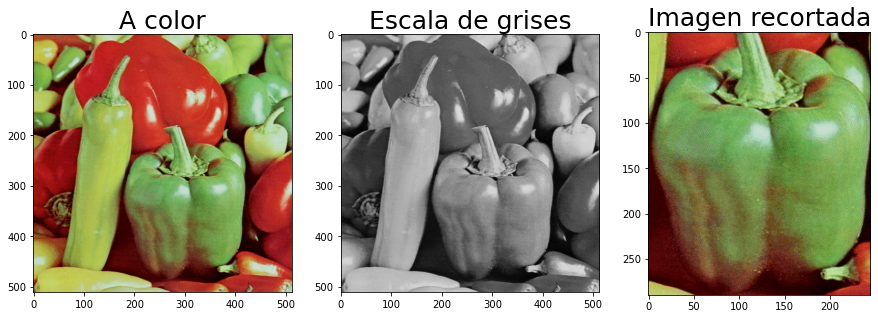

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,15),gridspec_kw={'width_ratios': [1, 1, 0.86]})
ax1.imshow(pimientos)
ax1.set_title('A color',size=25)
ax2.imshow(gray,cmap='gray', vmin=0, vmax=255)
ax2.set_title('Escala de grises',size=25)
ax3.imshow(pimientos[200:490,175:420,:],cmap='gray', vmin=0, vmax=255)
ax3.set_title('Imagen recortada',size=25)

#### 4.4.1. Recortela de manera que solo quede uno de los pimientos verdes en ese recorte

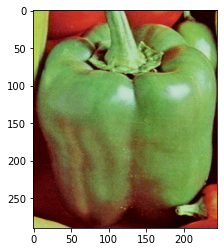

In [9]:
plt.imshow(pimientos[200:490,175:420,:],cmap='gray', vmin=0, vmax=255)

#### 4.4.2. Guárdela en formato .jpg.

In [10]:
plt.imsave('pimientosRGB_plt.jpg',pimientos[200:490,175:420,:], vmin=0, vmax=255)
plt.imsave('pimientosGray_plt.jpg',gray[200:490,175:420],cmap='gray',vmin=0, vmax=255)